# Q56094085 Homework1
## Answer is at the bottom

In [1]:
# clone darknet repo
!git clone https://github.com/AlexeyAB/darknet

fatal: destination path 'darknet' already exists and is not an empty directory.


In [35]:
# change makefile to have GPU and OPENCV enabled
%cd darknet
!sed -i 's/OPENCV=0/OPENCV=1/' Makefile
!sed -i 's/GPU=0/GPU=1/' Makefile
!sed -i 's/CUDNN=0/CUDNN=1/' Makefile
!sed -i 's/CUDNN_HALF=0/CUDNN_HALF=1/' Makefile

[Errno 20] Not a directory: 'darknet'
/content/darknet


In [36]:
# verify CUDA
!/usr/local/cuda/bin/nvcc --version

nvcc: NVIDIA (R) Cuda compiler driver
Copyright (c) 2005-2019 NVIDIA Corporation
Built on Sun_Jul_28_19:07:16_PDT_2019
Cuda compilation tools, release 10.1, V10.1.243


In [4]:
# make darknet (builds darknet so that you can then use the darknet executable file to run or train object detectors)
!make

chmod +x *.sh
g++ -std=c++11 -std=c++11 -Iinclude/ -I3rdparty/stb/include -DOPENCV `pkg-config --cflags opencv4 2> /dev/null || pkg-config --cflags opencv` -DGPU -I/usr/local/cuda/include/ -DCUDNN -DCUDNN_HALF -Wall -Wfatal-errors -Wno-unused-result -Wno-unknown-pragmas -fPIC -Ofast -DOPENCV -DGPU -DCUDNN -I/usr/local/cudnn/include -DCUDNN_HALF -c ./src/image_opencv.cpp -o obj/image_opencv.o
./src/image_opencv.cpp: In function ‘void draw_detections_cv_v3(void**, detection*, int, float, char**, image**, int, int)’:
./src/image_opencv.cpp:926:23: warning: variable ‘rgb’ set but not used [-Wunused-but-set-variable]
                 float rgb[3];
                       ^~~
./src/image_opencv.cpp: In function ‘void draw_train_loss(char*, void**, int, float, float, int, int, float, int, char*, float, int, int, double)’:
./src/image_opencv.cpp:1127:13: warning: this ‘if’ clause does not guard... [-Wmisleading-indentation]
             if (iteration_old == 0)
             ^~
./src/image_opencv

In [5]:
# define helper functions
def imShow(path):
  import cv2
  import matplotlib.pyplot as plt
  %matplotlib inline

  image = cv2.imread(path)
  height, width = image.shape[:2]
  resized_image = cv2.resize(image,(3*width, 3*height), interpolation = cv2.INTER_CUBIC)

  fig = plt.gcf()
  fig.set_size_inches(18, 10)
  plt.axis("off")
  plt.imshow(cv2.cvtColor(resized_image, cv2.COLOR_BGR2RGB))
  plt.show()

# use this to upload files
def upload():
  from google.colab import files
  uploaded = files.upload() 
  for name, data in uploaded.items():
    with open(name, 'wb') as f:
      f.write(data)
      print ('saved file', name)

# use this to download a file  
def download(path):
  from google.colab import files
  files.download(path)

In [6]:
%cd ..
from google.colab import drive
drive.mount('/content/gdrive')

/content
Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [7]:
# this creates a symbolic link so that now the path /content/gdrive/My\ Drive/ is equal to /mydrive
!ln -s /content/gdrive/My\ Drive/ /mydrive
!ls /mydrive

ln: failed to create symbolic link '/mydrive/My Drive': File exists
 20200812已借出設備.gsheet   med	 學術倫理證書.pdf   水表
 20200812已借出設備.xlsx    'My Drive'	 影像處理講義	    計畫
'block chain'		     Paper	 敏涵交接
'Colab Notebooks'	     Survey	 新生訓練


In [8]:
# cd back into the darknet folder to run detections
%cd darknet

/content/darknet


In [9]:
# this is where my datasets are stored within my Google Drive (I created a yolov4 folder to store all important files for custom training) 
!ls /mydrive/med

backup		    generate_train.py  yolov4-tiny.conv.zip
EKG.v6.darknet.zip  hw1.ipynb	       yolov4-tiny_custom.cfg
EKG.zip		    obj.data	       yolov4-tiny_heart.cfg
generate_test.py    obj.names


In [10]:
# copy over both datasets into the root directory of the Colab VM (comment out test.zip if you are not using a validation dataset)
!cp /mydrive/med/EKG.v6.darknet.zip ../

In [11]:
# unzip the datasets and their contents so that they are now in /darknet/data/ folder
!unzip ../EKG.v6.darknet.zip -d data/

Archive:  ../EKG.v6.darknet.zip
replace data/README.roboflow.txt? [y]es, [n]o, [A]ll, [N]one, [r]ename: 

In [12]:
!ls data/

9k.tree      goal.txt		       obj.data		    test
coco9k.map   horses.jpg		       obj.names	    test.txt
coco.names   imagenet.labels.list      openimages.names     train.txt
dog.jpg      imagenet.shortnames.list  person.jpg	    voc.names
eagle.jpg    labels		       README.roboflow.txt
giraffe.jpg  obj		       scream.jpg


In [13]:
# upload the custom .cfg back to cloud VM from Google Drive
!cp /mydrive/med/yolov4-tiny_heart.cfg ./cfg

In [14]:
# upload the obj.names and obj.data files to cloud VM from Google Drive
!cp /mydrive/med/obj.names ./data
!cp /mydrive/med/obj.data  ./data

In [15]:
! ls ./data
! mv ./data/train ./data/obj
! mv ./data/valid ./data/test

9k.tree      goal.txt		       obj.data		    test
coco9k.map   horses.jpg		       obj.names	    test.txt
coco.names   imagenet.labels.list      openimages.names     train.txt
dog.jpg      imagenet.shortnames.list  person.jpg	    voc.names
eagle.jpg    labels		       README.roboflow.txt
giraffe.jpg  obj		       scream.jpg
mv: cannot stat './data/train': No such file or directory
mv: cannot stat './data/valid': No such file or directory


In [16]:
# upload the generate_train.py and generate_test.py script to cloud VM from Google Drive
!cp /mydrive/med/generate_test.py ./
!cp /mydrive/med/generate_train.py ./

Now simply run both scripts to do the work for you of generating the two txt files.

In [17]:
!python generate_train.py
!python generate_test.py

In [18]:
# verify that the newly generated train.txt and test.txt can be seen in our darknet/data folder
!ls data/

9k.tree      goal.txt		       obj.data		    test
coco9k.map   horses.jpg		       obj.names	    test.txt
coco.names   imagenet.labels.list      openimages.names     train.txt
dog.jpg      imagenet.shortnames.list  person.jpg	    voc.names
eagle.jpg    labels		       README.roboflow.txt
giraffe.jpg  obj		       scream.jpg


In [19]:
!cp /mydrive/med/yolov4-tiny.conv.zip ./

In [20]:
!cp /mydrive/med/yolov4-tiny_custom.cfg ./cfg
!cp ./cfg/yolov4-tiny_custom.cfg ./cfg/yolov4-tiny_heart.cfg
!ls cfg

9k.labels				    resnext152-32x4d.cfg
9k.names				    rnn.cfg
9k.tree					    rnn.train.cfg
alexnet.cfg				    strided.cfg
cd53paspp-gamma.cfg			    t1.test.cfg
cifar.cfg				    tiny.cfg
cifar.test.cfg				    tiny-yolo.cfg
coco9k.map				    tiny-yolo-voc.cfg
coco.data				    tiny-yolo_xnor.cfg
coco.names				    vgg-16.cfg
combine9k.data				    vgg-conv.cfg
crnn.train.cfg				    voc.data
csdarknet53-omega.cfg			    writing.cfg
cspx-p7-mish.cfg			    yolo.2.0.cfg
cspx-p7-mish_hp.cfg			    yolo9000.cfg
cspx-p7-mish-omega.cfg			    yolo.cfg
csresnext50-panet-spp.cfg		    yolov1
csresnext50-panet-spp-original-optimal.cfg  yolov2.cfg
darknet19_448.cfg			    yolov2-tiny.cfg
darknet19.cfg				    yolov2-tiny-voc.cfg
darknet53_448_xnor.cfg			    yolov2-voc.cfg
darknet53.cfg				    yolov3_5l.cfg
darknet.cfg				    yolov3.cfg
densenet201.cfg				    yolov3.coco-giou-12.cfg
efficientnet_b0.cfg			    yolov3-openimages.cfg
efficientnet-lite3.cfg			    yolov3-spp.cfg
enet-coco.cfg				    yolov3-tiny_3l

In [21]:
!unzip ./yolov4-tiny.conv.zip

Archive:  ./yolov4-tiny.conv.zip
replace yolov4-tiny.conv.29? [y]es, [n]o, [A]ll, [N]one, [r]ename: 

In [22]:
!cp /mydrive/med/yolov4-tiny_heart.cfg cfg/

## Train

In [23]:
# train your custom detector! (uncomment %%capture below if you run into memory issues or your Colab is crashing)
# %%capture
!./darknet detector train data/obj.data cfg/yolov4-tiny_heart.cfg yolov4-tiny.conv.29 -dont_show -map

Streaming output truncated to the last 5000 lines.
 total_bbox = 5122219, rewritten_bbox = 4.836107 % 
v3 (iou loss, Normalizer: (iou: 0.07, obj: 1.00, cls: 1.00) Region 30 Avg (IOU: 0.699588), count: 2, class_loss = 0.731191, iou_loss = 0.301723, total_loss = 1.032914 
v3 (iou loss, Normalizer: (iou: 0.07, obj: 1.00, cls: 1.00) Region 37 Avg (IOU: 0.823010), count: 27, class_loss = 1.294835, iou_loss = 152.621017, total_loss = 153.915848 
 total_bbox = 5122248, rewritten_bbox = 4.836080 % 
v3 (iou loss, Normalizer: (iou: 0.07, obj: 1.00, cls: 1.00) Region 30 Avg (IOU: 0.000000), count: 1, class_loss = 0.000007, iou_loss = 0.000000, total_loss = 0.000007 
v3 (iou loss, Normalizer: (iou: 0.07, obj: 1.00, cls: 1.00) Region 37 Avg (IOU: 0.838756), count: 29, class_loss = 1.934065, iou_loss = 129.404556, total_loss = 131.338623 
 total_bbox = 5122277, rewritten_bbox = 4.836052 % 
v3 (iou loss, Normalizer: (iou: 0.07, obj: 1.00, cls: 1.00) Region 30 Avg (IOU: 0.000000), count: 1, class_loss

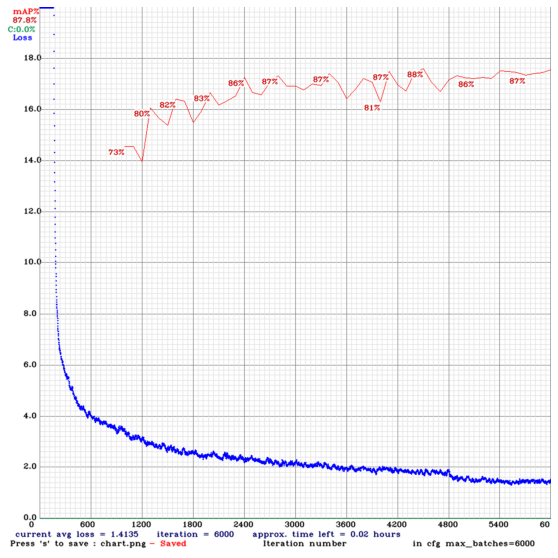

In [25]:
# show chart.png of how custom object detector did with training
imShow('chart.png')

In [26]:
!cp /mydrive/med/EKG.zip .
!unzip EKG.zip
!ls

Archive:  EKG.zip
   creating: EKG/
  inflating: EKG/EKG_001-120.zip     
  inflating: EKG/EKG_121-240.zip     
  inflating: EKG/EKG_241-360.zip     
  inflating: EKG/EKG_361-480.zip     
  inflating: EKG/EKG_481-600.zip     
3rdparty		     darknet.py		    net_cam_v3.sh
backup			     darknet_video.py	    net_cam_v4.sh
build			     data		    obj
build.ps1		     EKG		    README.md
build.sh		     EKG.zip		    results
cfg			     generate_test.py	    scripts
chart.png		     generate_train.py	    src
chart_yolov4-tiny_heart.png  image_yolov3.sh	    video_yolov3.sh
cmake			     image_yolov4.sh	    video_yolov4.sh
CMakeLists.txt		     include		    yolov4-tiny.conv.29
darknet			     json_mjpeg_streams.sh  yolov4-tiny.conv.zip
DarknetConfig.cmake.in	     LICENSE
darknet_images.py	     Makefile


In [27]:
!unzip EKG/EKG_001-120.zip 

Archive:  EKG/EKG_001-120.zip
   creating: EKG_001-120/
  inflating: EKG_001-120/1.jpg       
  inflating: EKG_001-120/2.jpg       
  inflating: EKG_001-120/3.jpg       
  inflating: EKG_001-120/4.jpg       
  inflating: EKG_001-120/5.jpg       
  inflating: EKG_001-120/6.jpg       
  inflating: EKG_001-120/7.jpg       
  inflating: EKG_001-120/8.jpg       
  inflating: EKG_001-120/9.jpg       
  inflating: EKG_001-120/10.jpg      
  inflating: EKG_001-120/11.jpg      
  inflating: EKG_001-120/12.jpg      
  inflating: EKG_001-120/13.jpg      
  inflating: EKG_001-120/14.jpg      
  inflating: EKG_001-120/15.jpg      
  inflating: EKG_001-120/16.jpg      
  inflating: EKG_001-120/17.jpg      
  inflating: EKG_001-120/18.jpg      
  inflating: EKG_001-120/19.jpg      
  inflating: EKG_001-120/20.jpg      
  inflating: EKG_001-120/21.jpg      
  inflating: EKG_001-120/22.jpg      
  inflating: EKG_001-120/23.jpg      
  inflating: EKG_001-120/24.jpg      
  inflating: EKG_001-120/25.jpg 

In [28]:
# need to set our custom cfg to test mode 
%cd cfg
!sed -i 's/batch=64/batch=1/' yolov4-tiny_heart.cfg
!sed -i 's/subdivisions=16/subdivisions=1/' yolov4-tiny_heart.cfg
%cd ..

/content/darknet/cfg
/content/darknet


# Homework 1

## Divide the twelve leads into 12 sheets and use them in matrix format

In [29]:
import cv2
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np


In [30]:
def plot_img(img_array):
    plt.rcParams['figure.figsize'] = [20, 16]
    plt.rcParams['figure.dpi'] = 200 # 200 e.g. is really fine, but slower
    fig, ax = plt.subplots()
    img_num = len(img_array)
    for i in range(img_num):
        plt.subplot(1, img_num, i+1)
        img = cv2.cvtColor(img_array[i],cv2.COLOR_BGR2RGB)
        plt.imshow(img)
        plt.axis('off')
        plt.title(i+1)   
def concat_12img(img_array):
    img_num = len(img_array)
    ex_concat = np.expand_dims(img_array[0], axis=0)
    for i in range(1,img_num):
        ex_img = np.expand_dims(img_array[i], axis=0)
        ex_concat = np.concatenate((ex_concat, ex_img), axis=0)
    print("Img.shape= ",ex_concat.shape)
    
def crop_12img(img):
    # img : 1024, 1448, 3
    (hs,he,ws,we) = (370,-190,120,-120)
    h_target_num = 3
    w_target_num = 4
    crop = img[hs:he,ws:we]
    h, w, _ = crop.shape
    h_seg = h//h_target_num
    w_seg = w//w_target_num
    h_start = 0
    h_end = 0
    crop_arr = []
    for i in range(h_target_num):
        h_start = h_end
        h_end = h_end + h_seg
        w_start = 0
        w_end = 0
        for k in range(w_target_num):
            w_start = w_end
            w_end = w_end + w_seg
            crop_arr.append(crop[h_start:h_end, w_start:w_end])
    plot_img(crop_arr)
    concat_12img(crop_arr)

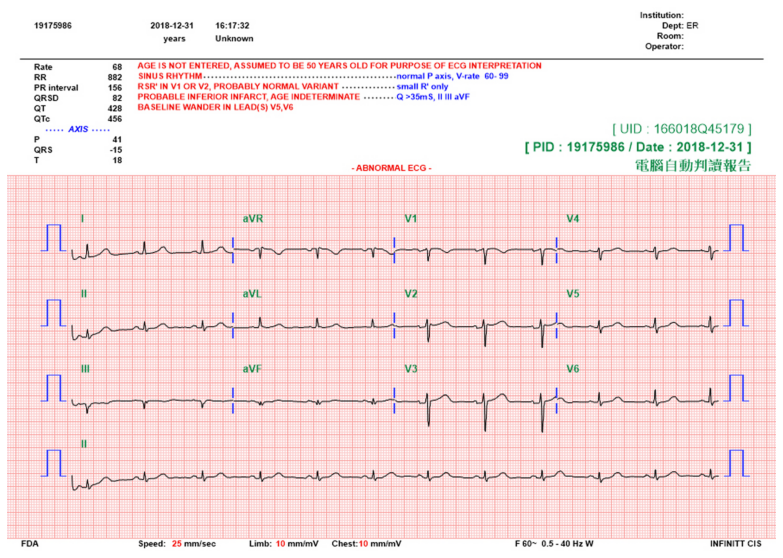

Img.shape=  (12, 154, 302, 3)


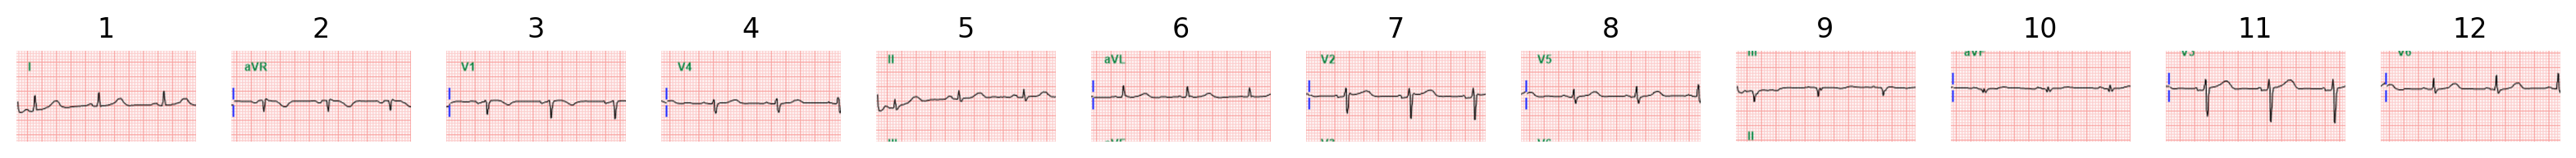

In [31]:
IMG_PATH = "EKG_001-120/61.jpg"
imShow(IMG_PATH)
show_img = cv2.imread(IMG_PATH,1)
crop_12img(show_img)

## Try segmentation by NN

 CUDA-version: 10010 (10010), cuDNN: 7.6.5, CUDNN_HALF=1, GPU count: 1  
 OpenCV version: 3.2.0
 0 : compute_capability = 750, cudnn_half = 1, GPU: Tesla T4 
   layer   filters  size/strd(dil)      input                output
   0 conv     32       3 x 3/ 2    416 x 416 x   3 ->  208 x 208 x  32 0.075 BF
   1 conv     64       3 x 3/ 2    208 x 208 x  32 ->  104 x 104 x  64 0.399 BF
   2 conv     64       3 x 3/ 1    104 x 104 x  64 ->  104 x 104 x  64 0.797 BF
   3 route  2 		                       1/2 ->  104 x 104 x  32 
   4 conv     32       3 x 3/ 1    104 x 104 x  32 ->  104 x 104 x  32 0.199 BF
   5 conv     32       3 x 3/ 1    104 x 104 x  32 ->  104 x 104 x  32 0.199 BF
   6 route  5 4 	                           ->  104 x 104 x  64 
   7 conv     64       1 x 1/ 1    104 x 104 x  64 ->  104 x 104 x  64 0.089 BF
   8 route  2 7 	                           ->  104 x 104 x 128 
   9 max                2x 2/ 2    104 x 104 x 128 ->   52 x  52 x 128 0.001 BF
  10 conv    128    

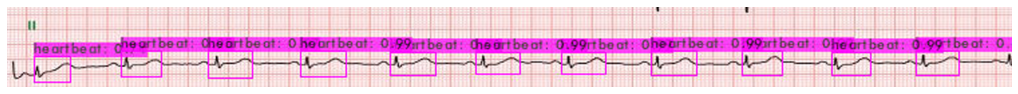

In [37]:
(lead2_hs, lead2_he, lead2_ws, lead2_we) = (790, -100, 115, -120)
IMG_PATH = "EKG_001-120/61.jpg"
# imShow(IMG_PATH)
show_img = cv2.imread(IMG_PATH,1)
crop = show_img[lead2_hs:lead2_he,lead2_ws:lead2_we]
pic = cv2.resize(crop, (751, 60), interpolation=cv2.INTER_CUBIC)
plot_img([pic])
cv2.imwrite("tmp.jpg", pic)
!./darknet detector test data/obj.data cfg/yolov4-tiny_heart.cfg /mydrive/med/backup/yolov4-tiny_heart_last.weights tmp.jpg -thresh 0.3 -out result.json -ext_output > result.txt
imShow('predictions.jpg')

## Calculate the number of heartbeats with Long lead II

In [38]:
file = open("result.txt","r")
count = 0
for i in file:
  if "heartbeat" in i:
    count += 1
print("Number of heartbeats with Long lead II : {}".format(count))

Number of heartbeats with Long lead II : 11


## Cut each heartbeat of Long lead II 

(60, 751, 3)
crop_pic: (19, 27, 3)
left_x:20 top_y:37 width:27 height:19
(60, 751, 3)
crop_pic: (19, 30, 3)
left_x:85 top_y:34 width:30 height:19
(60, 751, 3)
crop_pic: (20, 33, 3)
left_x:151 top_y:33 width:33 height:20
(60, 751, 3)
crop_pic: (18, 33, 3)
left_x:220 top_y:34 width:33 height:18
(60, 751, 3)
crop_pic: (17, 34, 3)
left_x:286 top_y:34 width:34 height:17
(60, 751, 3)
crop_pic: (16, 33, 3)
left_x:350 top_y:35 width:33 height:16
(60, 751, 3)
crop_pic: (16, 33, 3)
left_x:415 top_y:35 width:33 height:16
(60, 751, 3)
crop_pic: (18, 34, 3)
left_x:482 top_y:34 width:34 height:18
(60, 751, 3)
crop_pic: (18, 31, 3)
left_x:549 top_y:33 width:31 height:18
(60, 751, 3)
crop_pic: (17, 30, 3)
left_x:616 top_y:34 width:30 height:17
(60, 751, 3)
crop_pic: (18, 32, 3)
left_x:679 top_y:33 width:32 height:18


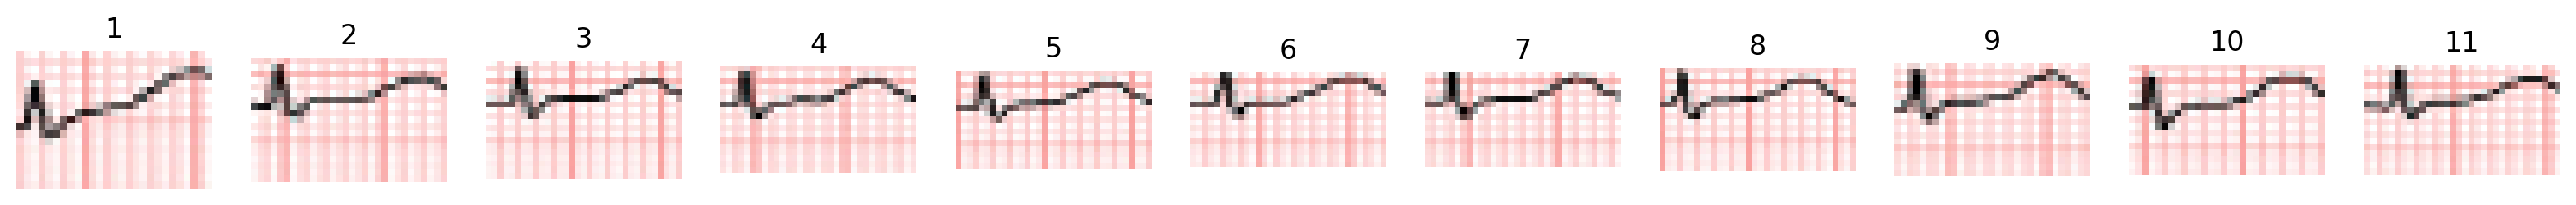

In [39]:
(lead2_hs, lead2_he, lead2_ws, lead2_we) = (790, -90, 115, -120)
IMG_PATH = "EKG_001-120/61.jpg"
# imShow(IMG_PATH)
show_img = cv2.imread(IMG_PATH,1)
crop = show_img[lead2_hs:lead2_he,lead2_ws:lead2_we]
pic = cv2.resize(crop, (751, 60), interpolation=cv2.INTER_CUBIC)

file = open("result.txt","r")
count = 0
cor = []
crop_img = []
for i in file:
  if "heartbeat" in i:
    str_split = i.split("(")
    num = str_split[1].split(")")[0].split(" ")
    cor_list = []
    for n in num:
      if not n.isspace():
        try:
          n_num = int(n)
          cor_list.append(n_num)
        except:
          pass
    cor.append(cor_list)
    x, y, w, h = cor_list[0], cor_list[1], cor_list[2], cor_list[3]
    print(pic.shape)
    crop_pic = pic[y:y+h,x:x+w]
    print("crop_pic:",crop_pic.shape)
    crop_img.append(crop_pic)
    print("left_x:{} top_y:{} width:{} height:{}".format(x,y,w,h))
plot_img(crop_img)